In [1]:
# Imports
import astropy.constants as c
import astropy.units as u
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline
matplotlib.rc('font',size=20)

In [38]:
# Parameters
#outputDir='../../../output/Hen15/'
outputDir='../../../output/merge/hack1/'
obsDir='../../../MCMC/ObsConstraints/'
filePrefix='SA_output_'
filePostfix='.h5'
snap='58'
firstFile=0
lastFile=9
maxFile=512
# Bins for hostogram and plotting
binperdex=10
xrange=np.array([7,12])
nbin=(xrange[1]-xrange[0])*binperdex
# Simulation parameters (read from file!)
hubble=0.673
boxside=480.28  # Units Mpc/h 

In [39]:
# First determine the size of the arrays that we need to hold the data
nGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGal+=len(f[snap])
print('nGal=',nGal)

# Declare numpy arrays to hold the data
Type=np.empty(nGal)
StellarMass=np.empty(nGal)

# Now read in the data
iGal=0
for iFile in range(firstFile,lastFile+1):
    # The following line closes the file at the end of the loop
    with h5py.File(outputDir+filePrefix+'%i'%iFile+filePostfix,'r') as f:
        nGalFile=len(f[snap])
        Type[iGal:iGal+nGalFile]=f[snap]['Type']
        StellarMass[iGal:iGal+nGalFile]=f[snap]['StellarMass']
        iGal+=nGalFile

nGal= 80404


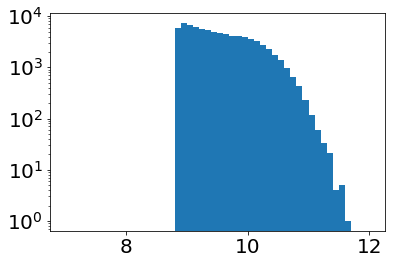

In [40]:
# Put into bins and normalise to number per unit volume (Mpc/h) per dex
nobj,bins,junk=plt.hist(np.log10(StellarMass*1e10*hubble), bins=nbin, range=xrange, log=True)
y=nobj*maxFile/((lastFile-firstFile+1)*boxside**3)*binperdex

# Plot at centre of bins
x=0.5*(bins[:-1]+bins[1:])


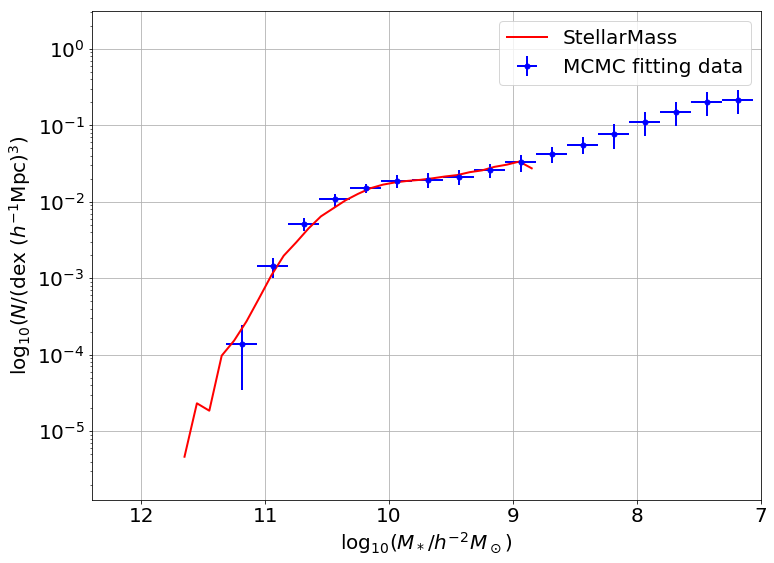

In [41]:
# Plot SMF of data
plt.figure(0,figsize=(12,9))
plt.semilogy(x,y,'-r',label='StellarMass')
plt.axis([12.4,7,10.**(-5.9),10.**0.5])
plt.xlabel(r'$\log_{10}(M_*/h^{-2}M_\odot)$')
plt.ylabel(r'$\log_{10}(N/(\mathrm{dex}\ (h^{-1}\mathrm{Mpc})^3)$')
plt.grid(True)

# Plot Observations
obsFile=obsDir+'StellarMassFunction_z0.00.txt'
fobs = open(obsFile, 'r')     
nline = int(fobs.readline())
obs=np.empty([nline,4])
for iline in range(nline): obs[iline,:]=fobs.readline().split()
fobs.close()
plt.errorbar((obs[:,0]+obs[:,1])/2.,obs[:,2],xerr=(obs[:,1]-obs[:,0])/2.,yerr=obs[:,3],
                 fmt='o', markersize=5, ecolor='blue', color='blue',label='MCMC fitting data')

plt.legend()
plt.savefig('figs/SMF_'+outputDir.split('/')[-2]+'.png')